In [10]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [11]:
from tensorflow.examples.tutorials.mnist import input_data

In [34]:
tf.set_random_seed(777)

In [43]:
tf.reset_default_graph()

In [36]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [44]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [45]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [46]:
# weights & bias for nn layers
W1 = tf.get_variable("W1", shape = [784, 512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape = [512, 512], initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape = [512, 10], initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [47]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [48]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [49]:
# train my model
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Epoch :  0001 cost =  0.304819070
Epoch :  0002 cost =  0.107969088
Epoch :  0003 cost =  0.073866391
Epoch :  0004 cost =  0.055470833
Epoch :  0005 cost =  0.044955875
Epoch :  0006 cost =  0.033934491
Epoch :  0007 cost =  0.030975760
Epoch :  0008 cost =  0.029289905
Epoch :  0009 cost =  0.022293691
Epoch :  0010 cost =  0.019829338
Epoch :  0011 cost =  0.018986780
Epoch :  0012 cost =  0.016226108
Epoch :  0013 cost =  0.016462359
Epoch :  0014 cost =  0.018238927
Epoch :  0015 cost =  0.013808414
Learning Finished!


In [50]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, 
                              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

Accuracy :  0.9779


Label :  [5]
Prediction :  [5]


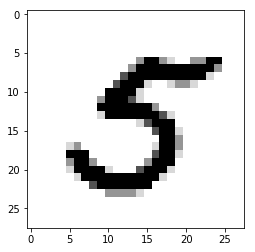

In [51]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction : ', sess.run(tf.argmax(hypothesis, 1), 
                                feed_dict = {X : mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()